In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [51]:
def r_squared(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2)/np.sum((y_true - np.mean(y_true))**2))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def plot_forecast(y_train, y_test, y_forecast, trim = 300):
    T = len(y_train)
    horizon = len(y_test)
    fig = plt.figure(figsize = (8,4.5))
    plt.plot(range(trim, T), y_train[trim:], label = 'train')
    plt.xlabel('Период')
    plt.ylabel('Значение')
    plt.title(r'Тренинговая, тестовая выборки и прогноз')
    plt.plot(range(T, T + horizon), y_test, label = 'test')
    plt.plot(range(T, T + horizon), y_forecast, label = 'forecast')
    plt.legend()
    plt.show()

In [3]:
gdppc = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_gdp.csv', index_col = 0)
gdppc.index = pd.to_datetime(gdppc.index)
gdppc.index.freq = 'QS-OCT'
gdppc = gdppc['RGDPRU']
gdppc.head()

Date
2011-01-01    26470
2011-04-01    28625
2011-07-01    30177
2011-10-01    32312
2012-01-01    27980
Freq: QS-OCT, Name: RGDPRU, dtype: int64

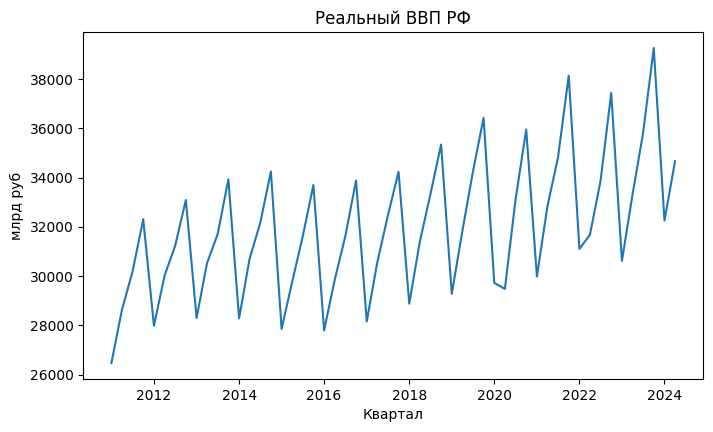

In [4]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(gdppc)
plt.xlabel('Квартал')
plt.ylabel('млрд руб')
plt.title('Реальный ВВП РФ')
plt.show()

In [31]:
y_train = gdppc.iloc[:-10]
y_test = gdppc.iloc[-10:]

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


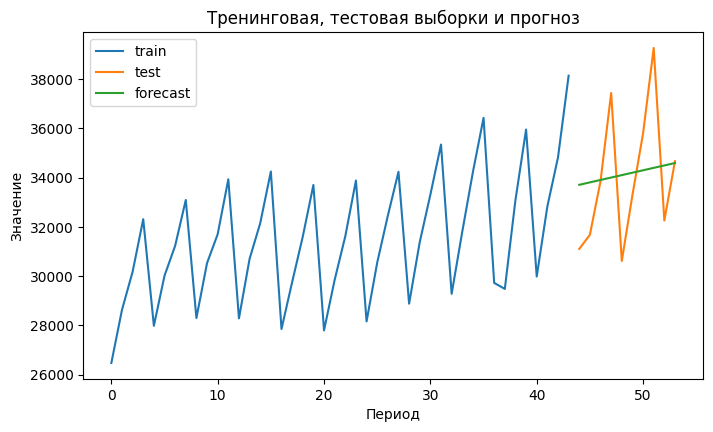

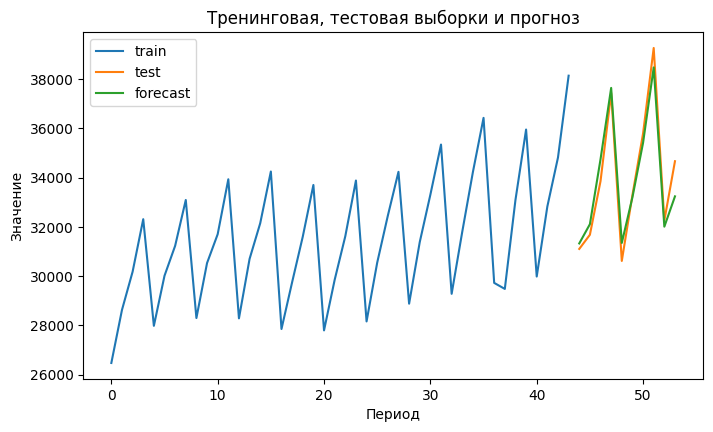

R-squared: 0.9376955805325643
RMSE: 670.0310605473417
MAPE: 1.5895288285506126


In [53]:
X = np.arange(1, len(y_train)+1)
X = sm.add_constant(X)
model = sm.OLS(y_train,X)
results = model.fit()
results_resid = sm.tsa.arima.ARIMA(results.resid, order = (1,0,0), seasonal_order=(2, 0, 0, 4)).fit()
trend_pred = []
resid_pred = results_resid.forecast(steps = len(y_test))
for t in range(len(y_test)):
    trend_pred.append(results.predict([1,len(y_train)+t+1]))
trend_pred = np.array(trend_pred).reshape(1, len(y_test))[0]
y_fcst = trend_pred + resid_pred
plot_forecast(y_train, y_test, trend_pred, trim = 0)
plot_forecast(y_train, y_test, y_fcst, trim = 0)
print('R-squared:', r_squared(y_test, y_fcst))
print('RMSE:', root_mean_squared_error(y_test, y_fcst))
print('MAPE:', mean_absolute_percentage_error(y_test, y_fcst))

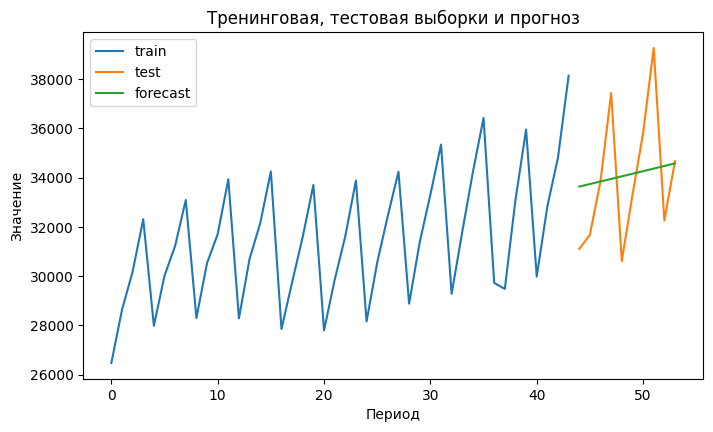

In [58]:
Y = np.log(y_train)
X = np.arange(1, len(y_train)+1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
trend_pred = []
for t in range(len(y_test)):
    trend_pred.append(results.predict([1,len(y_train)+t+1]))
trend_pred = np.exp(np.array(trend_pred)).reshape(1, len(y_test))[0]
plot_forecast(y_train, y_test, trend_pred, trim = 0)